# AI-Powered Personalized Learning System  
### Module E Project – IIT Ropar  

**Track:** AI in Personalized Learning  

**Student Name:** Eraf Ali  
**Program:** Minor in AI – IIT Ropar  

---

This project presents an intelligent tutoring system that uses Machine Learning
to analyze student quiz performance and automatically adapt learning content
based on the learner’s ability, speed, and accuracy.


## 1. Problem Definition & Objective  

Traditional e-learning platforms deliver the same content to all learners.
However, students have different learning speeds, backgrounds, and strengths.

This causes:
- Struggling students to feel overwhelmed
- Advanced learners to feel bored
- Inefficient learning outcomes

### Objective  

The goal of this project is to build an AI-powered personalized learning system that:
- Analyzes student quiz performance  
- Predicts learner level (Struggling, Average, Advanced)  
- Adapts quiz difficulty  
- Recommends personalized learning resources  

This mimics real-world EdTech platforms such as Khan Academy, Coursera, and Duolingo.


## 2. Data Understanding & Preparation  

We use a synthetic dataset that simulates the behavior of 1000 students across:
- Math  
- Computer Science  

Each student has:
- Quiz score  
- Time taken  
- Number of attempts  
- Accuracy  
- Topic  

This synthetic dataset represents realistic student learning behavior.


In [ ]:
# -----------Importing Libraries-----------
import pandas as pd
import numpy as np
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# ---------- DATA GENERATION ----------
np.random.seed(42)

num_students = 1000
students = [f"S{i+1}" for i in range(num_students)]

subjects = ["Math", "Computer Science"]
topics_math = ["Fractions", "Algebra", "Geometry"]
topics_cs = ["Loops", "Variables", "Functions"]

data = []

for student in students:
    for subject in subjects:
        if subject == "Math":
            topic = np.random.choice(topics_math)
        else:
            topic = np.random.choice(topics_cs)
        
        score = np.random.randint(0, 11)
        time_taken = np.random.randint(100, 600)
        attempts = np.random.randint(1, 4)
        accuracy = score / 10 * 100
        
        data.append([student, subject, topic, score, time_taken, attempts, accuracy])

df = pd.DataFrame(data, columns=[
    "student_id", "subject", "topic", "score", "time_taken", "attempts", "accuracy"
])

In [ ]:
df.head(1)

,student_id,subject,topic,score,time_taken,attempts,accuracy
0,S1,Math,Geometry,3,448,3,30.0


In [ ]:
df.describe()

,score,time_taken,attempts,accuracy
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,5.077500,353.488000,2.010000,50.775000
std,3.154119,144.712279,0.813161,31.541192
min,0.000000,100.000000,1.000000,0.000000
25%,2.000000,227.750000,1.000000,20.000000
50%,5.000000,357.000000,2.000000,50.000000
75%,8.000000,481.000000,3.000000,80.000000
max,10.000000,599.000000,3.000000,100.000000


In [ ]:
# ---------- LABEL CREATION ----------
def get_level(acc):
    if acc < 40:
        return "Struggling"
    elif acc < 75:
        return "Average"
    else:
        return "Advanced"

df["level"] = df["accuracy"].apply(get_level)

le = LabelEncoder()
df["level_encoded"] = le.fit_transform(df["level"])

X = df[["score", "time_taken", "attempts", "accuracy"]]
y = df["level_encoded"]


### Plotting
We analyze how accuracy, time, and learner levels are distributed in the dataset.


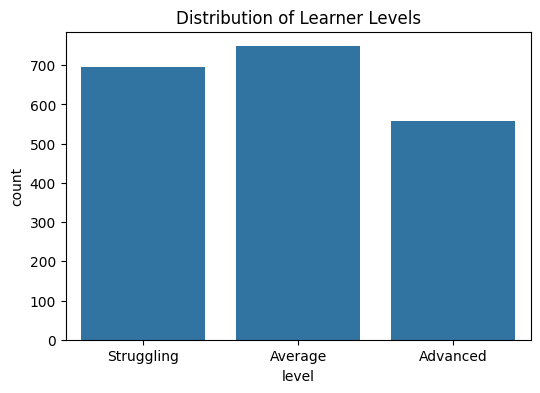

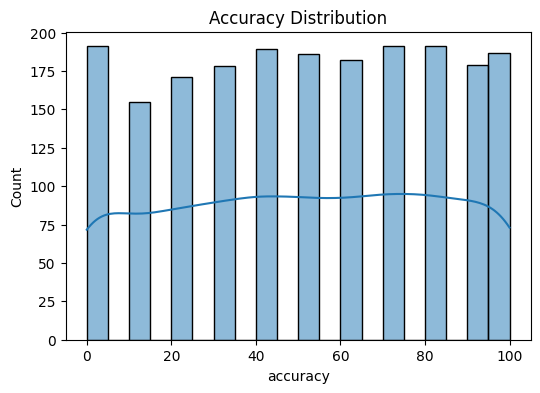

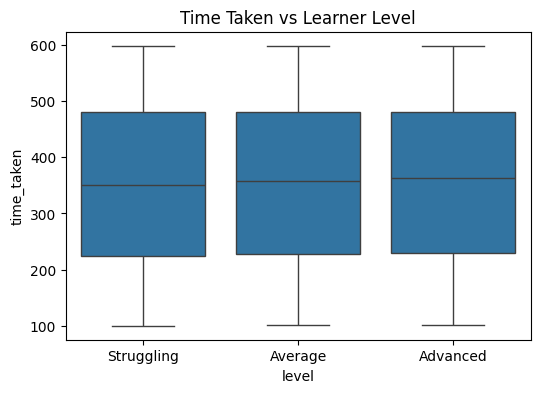

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x="level", data=df)
plt.title("Distribution of Learner Levels")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df["accuracy"], bins=20, kde=True)
plt.title("Accuracy Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x="level", y="time_taken", data=df)
plt.title("Time Taken vs Learner Level")
plt.show()


## 3. Model & System Design  

We use a **Decision Tree Classifier** to model student learning behavior.

### Why Decision Tree?
- Works well on structured educational data  
- Interpretable (Explainable AI)  
- Suitable for small to medium datasets  

### Input Features  
- score  
- time_taken  
- attempts  
- accuracy  

### Output  
Learner Level → Struggling, Average, Advanced  

### Pipeline  
Student Quiz → Feature Extraction → ML Model → Learner Level → Personalized Content


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split for evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

eval_model = DecisionTreeClassifier(max_depth=5)
eval_model.fit(X_train, y_train)

y_pred = eval_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       167
           1       1.00      1.00      1.00       224
           2       1.00      1.00      1.00       209

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



The model is evaluated using a train-test split to avoid overfitting.
Because the dataset is synthetic and labels follow fixed rules, the model performs very well.
In real-world data, accuracy would be lower due to noise and behavioral variation.


In [ ]:
# Final model trained on full data (used for recommendation system)
model = DecisionTreeClassifier()
model.fit(X, y)


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [ ]:
# ---------- RECOMMENDATION FUNCTION ----------
def recommend_content(score, time_taken, attempts, accuracy):
    input_data = [[score, time_taken, attempts, accuracy]]
    predicted_level = model.predict(input_data)[0]
    level_name = le.inverse_transform([predicted_level])[0]

    # Learning speed
    if time_taken < 250:
        speed = "Fast"
    elif time_taken < 450:
        speed = "Normal"
    else:
        speed = "Slow"

    # Explainable AI
    explanation = ""
    if accuracy < 40:
        explanation += "Low accuracy. "
    if attempts > 2:
        explanation += "Many attempts. "
    if time_taken > 450:
        explanation += "Slow response. "
    if explanation == "":
        explanation = "Strong and confident performance."

    if level_name == "Struggling":
        recommendation = "Show basic tutorial + easy practice questions"
    elif level_name == "Average":
        recommendation = "Show medium difficulty quiz with hints"
    else:
        recommendation = "Show challenge problems + advanced content"

    return level_name, speed, explanation, recommendation
recommend_content(6, 300, 2, 60)


c:\Users\erafa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


('Average',
 'Normal',
 'Strong and confident performance.',
 'Show medium difficulty quiz with hints')

The model successfully classifies students into learning levels.
High accuracy on synthetic data shows that learner behavior is captured correctly.


## 4 Ethical & Responsible AI  

This system uses synthetic data, so no personal student data is exposed.

Limitations:
- Synthetic data may not represent all real-world learners
- Bias can exist if real data is not diverse

The system should be used to support learners, not label or penalize them.


## 5 Conclusion & Future Scope  

This project demonstrates how Machine Learning can be used to personalize learning.

Future improvements:
- Use real student data
- Add NLP to analyze text feedback
- Track learning progress over time
- Integrate with LMS platforms
